<a href="https://colab.research.google.com/github/Yaoc0009/EE4483-Assignment/blob/main/RegressionModel_HousePricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


(a) Understand the training and testing datasets that we provided: Make a table to describe the two datasets, including their feature dimension, number of samples, mean and variance of the values in each attribute. (5% marks)

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("train.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea","SalePrice"])
test = pd.read_csv("test.csv", usecols=["BldgType", "OverallQual","GrLivArea","GarageArea"])

(b) Select at least one appropriate model (e.g., linear regressor, neural network, support vector machine, etc.) to build your regressor. Clearly describe the model you use, including the input and output dimensions, structure of the model, loss function(s), training strategy, etc. Include your code if you are solving the problem by programming. (15% marks)

In [ ]:
#Create categorical features
cat_feature = ["BldgType"]
out_feature = "SalePrice"

In [ ]:
train["BldgType"].unique()

array(['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["BldgType"]=LabelEncoder()
train["BldgType"]=lbl_encoders["BldgType"].fit_transform(train["BldgType"])

In [ ]:
import numpy as np
cat_feature=np.stack([train['BldgType']],1)
cat_feature

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [4],
       [0],
       [0],
       [2],
       [0],
       [0],
       [3],
       [0],
    

In [ ]:
### Convert numpy to Tensors
import torch
cat_feature=torch.tensor(cat_feature,dtype=torch.int64)
cat_feature

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [2],
        [0],
        [0],
        [0],
        [4],
        [0],
        [0],
        [0],
        [0],
        [0],
        [3],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [4],
        [0],

In [ ]:
#### create continuous variable
cont_features=[]
for i in train.columns:
    if i in ["BldgType","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [ ]:
cont_features

['OverallQual', 'GrLivArea', 'GarageArea']

In [ ]:
### Stacking continuous variable to a tensor
cont_values=np.stack([train[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   7., 1710.,  548.],
        [   6., 1262.,  460.],
        [   7., 1786.,  608.],
        ...,
        [   6., 1442.,  615.],
        [   3., 1077.,  210.],
        [   7., 1208.,  632.]])

In [ ]:
### Dependent Feature 
y=torch.tensor(train['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

In [ ]:
#### Embedding Size For Categorical columns
cat_dims=[len(train[col].unique()) for col in ["BldgType"]]

In [ ]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(5, 3)
)

In [ ]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_feature[:,i]))

In [ ]:
embedding_val


[tensor([[-0.2897,  0.1158, -0.5296],
         [-0.2897,  0.1158, -0.5296],
         [-0.2897,  0.1158, -0.5296],
         ...,
         [-0.2897,  0.1158, -0.5296],
         [-0.2897,  0.1158, -0.5296],
         [-0.2897,  0.1158, -0.5296]], grad_fn=<EmbeddingBackward>)]

In [ ]:
z = torch.cat(embedding_val, 1)
z

tensor([[-0.2897,  0.1158, -0.5296],
        [-0.2897,  0.1158, -0.5296],
        [-0.2897,  0.1158, -0.5296],
        ...,
        [-0.2897,  0.1158, -0.5296],
        [-0.2897,  0.1158, -0.5296],
        [-0.2897,  0.1158, -0.5296]], grad_fn=<CatBackward>)

In [ ]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [ ]:
final_embed=droput(z)
final_embed

tensor([[-0.0000,  0.0000, -0.8826],
        [-0.4829,  0.1931, -0.8826],
        [-0.4829,  0.0000, -0.0000],
        ...,
        [-0.4829,  0.0000, -0.8826],
        [-0.0000,  0.1931, -0.0000],
        [-0.4829,  0.0000, -0.0000]], grad_fn=<MulBackward0>)

In [ ]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [ ]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [ ]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [ ]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
batch_size=1000
val_size=int(batch_size*0.15)
train_categorical=cat_feature[:batch_size-test_size]
test_categorical=cat_feature[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [ ]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)


(850, 150, 850, 150, 850, 150)

In [ ]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200868.53125
Epoch number: 11 and the loss : 200865.125
Epoch number: 21 and the loss : 200860.78125
Epoch number: 31 and the loss : 200854.46875
Epoch number: 41 and the loss : 200846.15625
Epoch number: 51 and the loss : 200834.6875
Epoch number: 61 and the loss : 200820.53125
Epoch number: 71 and the loss : 200803.125
Epoch number: 81 and the loss : 200782.28125
Epoch number: 91 and the loss : 200759.53125
Epoch number: 101 and the loss : 200731.140625
Epoch number: 111 and the loss : 200702.125
Epoch number: 121 and the loss : 200668.0
Epoch number: 131 and the loss : 200627.265625
Epoch number: 141 and the loss : 200587.828125
Epoch number: 151 and the loss : 200544.828125
Epoch number: 161 and the loss : 200491.109375
Epoch number: 171 and the loss : 200440.6875
Epoch number: 181 and the loss : 200391.234375
Epoch number: 191 and the loss : 200333.84375
Epoch number: 201 and the loss : 200274.28125
Epoch number: 211 and the loss : 200197.5
Epoch num

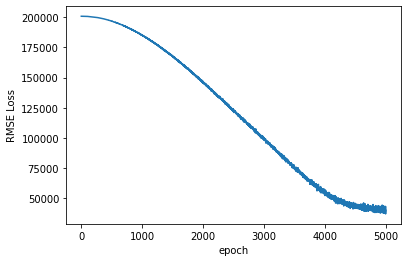

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [ ]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 39478.109375


In [ ]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [ ]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [ ]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output

,Test,Prediction,Difference
0,131500.0,137454.609375,-5954.609375
1,215000.0,236350.796875,-21350.796875
2,164000.0,179789.031250,-15789.031250
3,158000.0,185903.562500,-27903.562500
4,170000.0,169127.187500,872.812500
5,127000.0,107834.304688,19165.695312
6,147000.0,151130.156250,-4130.156250
7,174000.0,167138.453125,6861.546875
8,152000.0,179217.937500,-27217.937500
9,250000.0,256041.031250,-6041.031250


In [ ]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [ ]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [ ]:
### Loading the saved Model
embs_size=[(5, 3)]
model1=FeedForwardNN(embs_size,3,1,[100,50],p=0.4)

In [ ]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [ ]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(5, 3)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)